<a href="https://colab.research.google.com/github/yashrajOjha/multilingual-ner/blob/main/EDA_for_ai4bharat_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy seqeval pandas matplotlib scikit-learn transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=a7f12b64caddd1e501550a7c829a400dc842640cc0fffb3dffe17bafa609538e
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5

In [ ]:
from datasets import load_dataset
train_dataset = load_dataset('ai4bharat/naamapadam','hi',split='train[:9%]')

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset naamapadam downloaded and prepared to /root/.cache/huggingface/datasets/ai4bharat___naamapadam/hi/1.0.0/c1b045180d60b208d2468bdad897d04461f08c7137c04a85220697b1bef7df9a. Subsequent calls will reuse this data.


In [ ]:
train_dataset_kn = load_dataset('ai4bharat/naamapadam','kn',split='train[:9%]')

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset naamapadam downloaded and prepared to /root/.cache/huggingface/datasets/ai4bharat___naamapadam/kn/1.0.0/c1b045180d60b208d2468bdad897d04461f08c7137c04a85220697b1bef7df9a. Subsequent calls will reuse this data.


In [ ]:
train_dataset

Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 88721
})

In [ ]:
token_words = train_dataset_kn['tokens']

In [ ]:
import re

# Example nested list


# Remove special characters from each string in the nested list
for sublist in token_words:
    for i in range(len(sublist)):
        sublist[i] = re.sub(r'[^\w\s]', '', sublist[i])

In [ ]:
stopwords = []
f = open('/content/final_stopwords.txt','r')
for line in f:
    stopwords.append(line.strip()) # We don't want newlines in our list, do we?

In [ ]:
len(stopwords)

264

In [ ]:
# Remove stopwords from each sublist in the nested list
for sublist in token_words:
    sublist[:] = [word for word in sublist if word not in stopwords]

In [ ]:
!fc-list :lang=hi family

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                   "Arial Unicode MS"  # fc-list :lang=hi family
                                   ]

['ಮತತ', 'ಅವರ', 'ಆದರ', 'ಬಜಪ', 'ಕಗರಸ', 'ಭರತ', 'ಪರಧನ', 'ಬಗಗ', 'ಪಲಸ', 'ಪರಕರಣ']
[7083, 3405, 1475, 1352, 1310, 1119, 1060, 934, 904, 892]


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3205 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3206 missing from current font.
  font.set_text(s

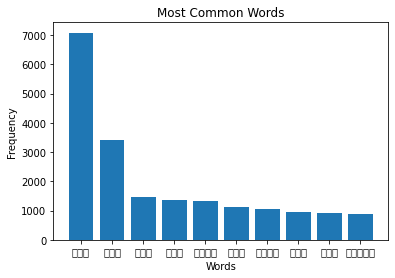

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Flatten the nested list into a single list
flat_list = [item for sublist in token_words for item in sublist if len(item) not in [0,1,2]]

# Use Counter to count the frequency of each word
word_counts = Counter(flat_list)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)
word_labels = [word[0] for word in most_common_words]
word_counts = [word[1] for word in most_common_words]

print(word_labels)
print(word_counts)
# Create a bar graph of the most common words
plt.bar(word_labels, word_counts)
plt.title("Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


{'B-PER': 27523, 'B-ORG': 15017, 'I-ORG': 12969, 'B-LOC': 16052, 'I-PER': 24144, 'I-LOC': 3930}


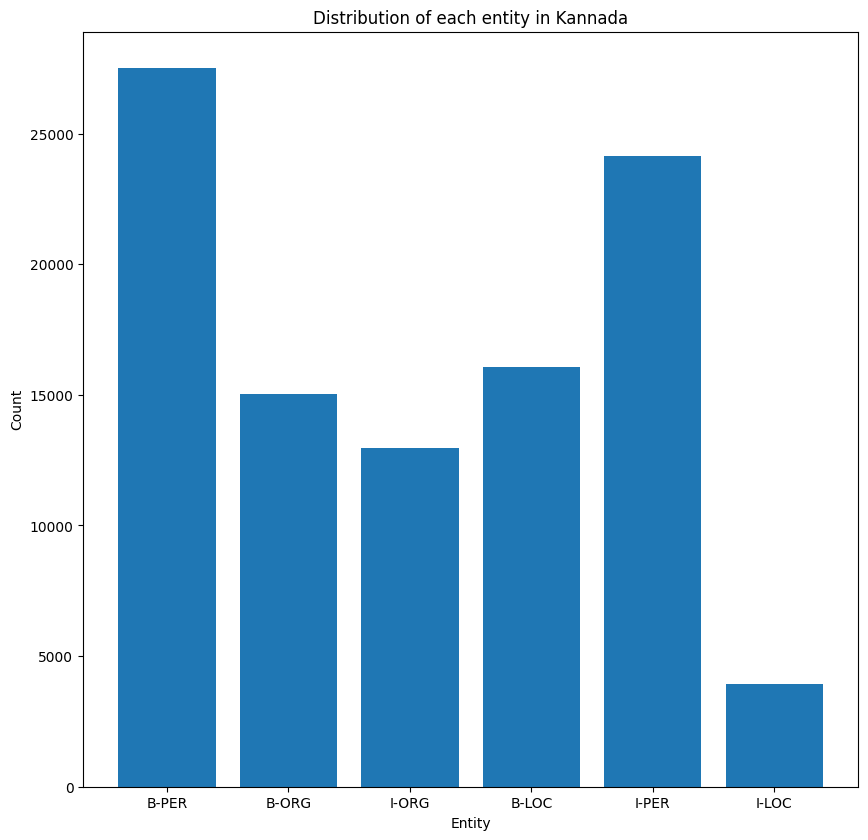

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


# Flatten the nested list
flat_list = [tag for sublist in train_dataset_kn['ner_tags'] for tag in sublist]

# Count the occurrences of each non-'O' element in the flattened list
counts = Counter([tag for tag in flat_list if tag != 'O'])


index2tag = {0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

mapped_counts = {index2tag[key]: value for key, value in counts.items()}
del mapped_counts['O']

print(mapped_counts)
# Create a bar graph of the counts
plt.figure(figsize=(10, 10), dpi=100)
plt.bar(mapped_counts.keys(), mapped_counts.values())
plt.title("Distribution of each entity in Kannada")
plt.xlabel('Entity')
plt.ylabel('Count')
plt.show()


In [ ]:
lengths = [len(sublist) for sublist in train_dataset['tokens']]

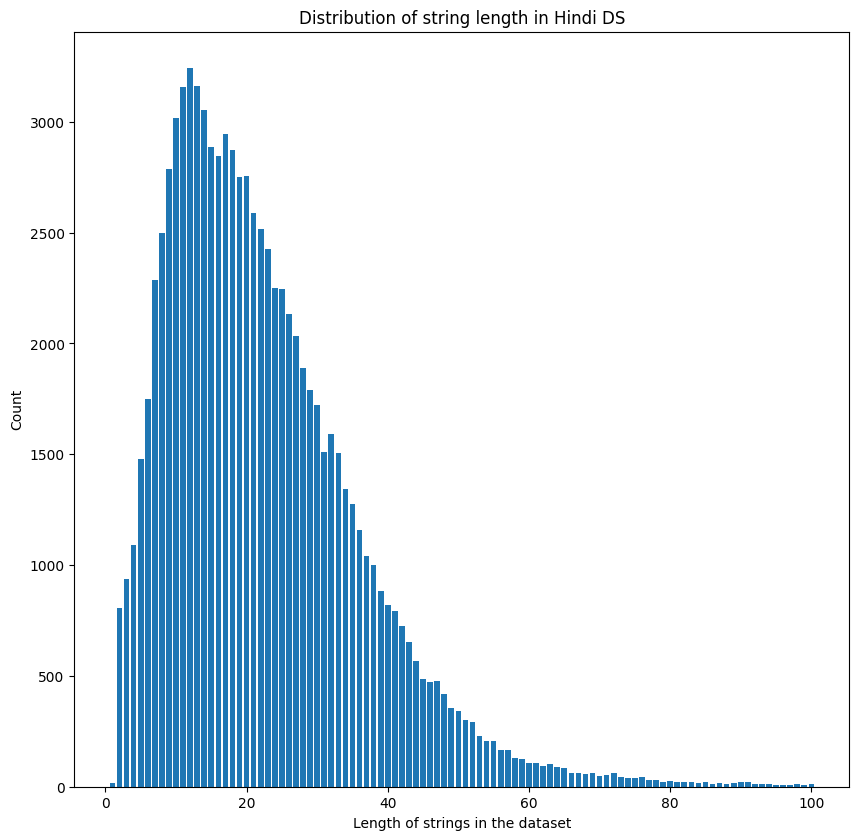

In [ ]:
counts = Counter(lengths)
plt.figure(figsize=(10, 10), dpi=100)
# Create a bar graph of the counts
plt.bar(counts.keys(), counts.values())
plt.title("Distribution of string length in Hindi DS")
plt.xlabel('Length of strings in the dataset')
plt.ylabel('Count')
plt.show()